<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/ESR/lorentzian/ESR%20Lorentzian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESR part B - scanning lorentzian response

In [1]:
!pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from uncertainties import ufloat
from uncertainties.umath import *
from scipy.stats import linregress

# 1 kHz experiment

DC = 0.539 mA

Wavegen = 1Khz, amplitude 5 Vpp

resonance voltage 446+/-7 mV
cos phi -0.10620012130950697


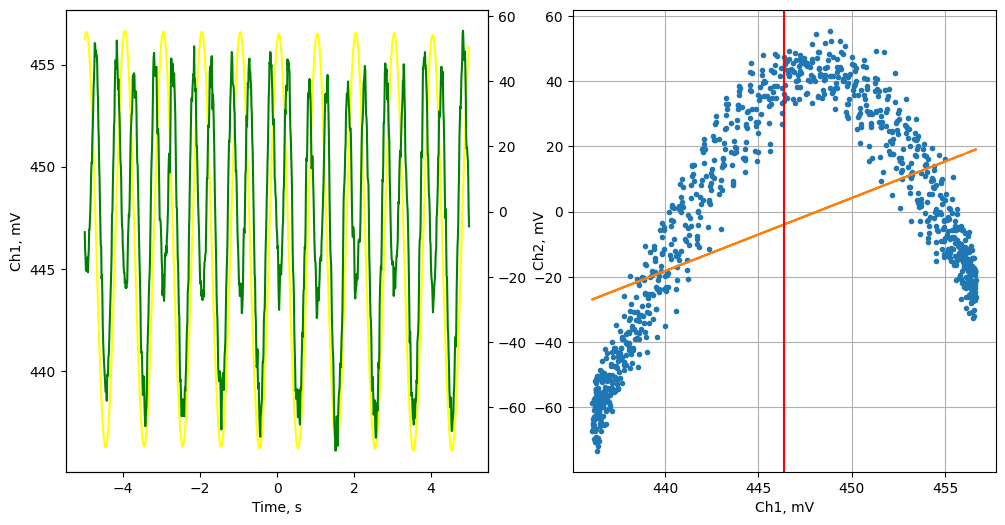

In [6]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/lorentzian/'
current = 534
filename = f'{url}{current}.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)
ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax0 = ax[0].twinx()
ax[0].plot(t, ch1, color='yellow')
ax0.plot(t, ch2, color='green')
ax[0].set_xlabel('Time, s')
ax[0].set_ylabel('Ch1, mV')
ax0.set_ylabel('Ch2, mV')

ax[1].plot(ch1, ch2,'.')
ax[1].grid()
vmean = np.mean(ch1)
vstd = np.std(ch1)
v0_2 = ufloat(vmean, vstd)
fit = linregress(ch1, ch2)
ax[1].plot(ch1, fit.slope * ch1 + fit.intercept)
ax[1].axvline(vmean, color='red')
ax[1].set_xlabel('Ch1, mV')
#ax[1].set_ylabel('Ch2, mV')

print(f'resonance voltage {v0_2} mV')
v12 = ch1 @ ch2
v11 = ch1 @ ch1
v22 = ch2 @ ch2
print(f'cos phi {v12 / np.sqrt(v11 * v22)}')


499: ch1:0 mV deriv: 2.14
508: ch1:0 mV deriv: 4.72
518: ch1:0 mV deriv: 8.88
528: ch1:0 mV deriv: 8.01
530: ch1:0 mV deriv: 6.18
534: ch1:0 mV deriv: 2.24
535: ch1:0 mV deriv: 0.20
539: ch1:0 mV deriv: -4.23
543: ch1:0 mV deriv: -7.55
548: ch1:0 mV deriv: -9.65
559: ch1:0 mV deriv: -6.21
569: ch1:0 mV deriv: -2.70
578: ch1:0 mV deriv: -1.27


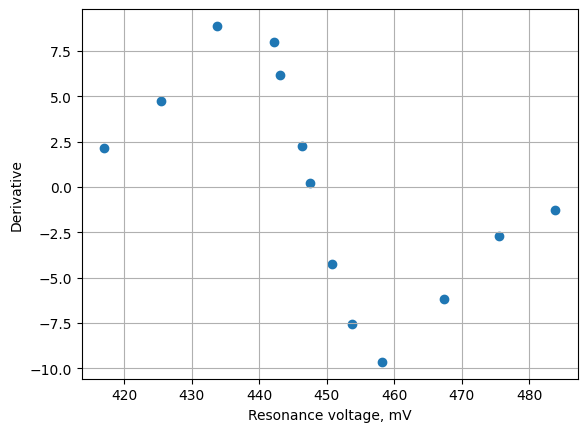

In [26]:
v_arr = []
d_arr = []
for current in [499, 508, 518, 528, 530, 534, 535, 539, 543, 548, 559, 569, 578]:
    filename = f'{url}{current}.csv'
    t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                         usecols=[1,2,3], unpack=True)
    #ch1 *=1e3 # mV
    #ch2 *=1e3 # mV
    #t *=1e3   # ms
    fit = linregress(ch1, ch2)
    deriv = fit.slope
    v = np.mean(ch1)
    print(f'{current}: ch1:{v:.0f} mV deriv: {deriv:.2f}')
    v_arr.append(v)
    d_arr.append(deriv)

v_arr = np.array(v_arr)
d_arr = np.array(d_arr)
plt.scatter(v_arr*1e3, d_arr)
plt.xlabel('Resonance voltage, mV')
plt.ylabel('Derivative')
plt.grid()

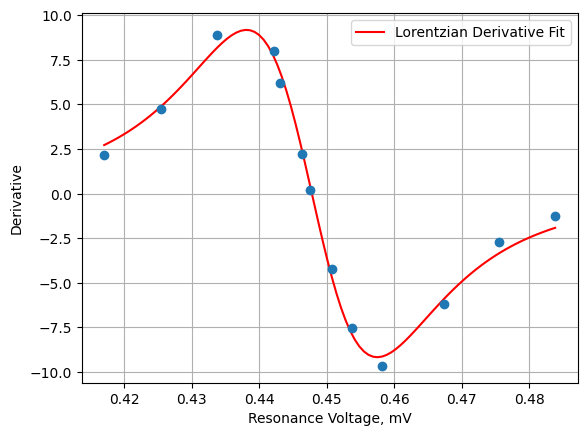

Fitted Parameters:
A: 0.2368169557974244
x0: 0.4478031330480536
gamma: 0.016779084759344802


In [18]:
# prompt: curve fit to lorentzian derivative

from scipy.optimize import curve_fit

def lorentzian_derivative(x, A, x0, gamma):
  """Derivative of a Lorentzian function."""
  return A * (-2 * (x - x0) / (gamma**2)) / (1 + ((x - x0) / gamma)**2)**2

# Fit the derivative data
popt, pcov = curve_fit(lorentzian_derivative, v_arr, d_arr)

# Extract fitted parameters
A_fit, x0_fit, gamma_fit = popt

# Plot the fitted curve
x_fit = np.linspace(min(v_arr), max(v_arr), 100)
y_fit = lorentzian_derivative(x_fit, A_fit, x0_fit, gamma_fit)

plt.plot(x_fit, y_fit, color='red', label='Lorentzian Derivative Fit')
plt.legend()
plt.plot(v_arr, d_arr, 'o', label='Data Points')
plt.xlabel('Resonance Voltage, mV')
plt.ylabel('Derivative')
plt.grid()
plt.show()

print(f"Fitted Parameters:")
print(f"A: {A_fit}")
print(f"x0: {x0_fit}")
print(f"gamma: {gamma_fit}")


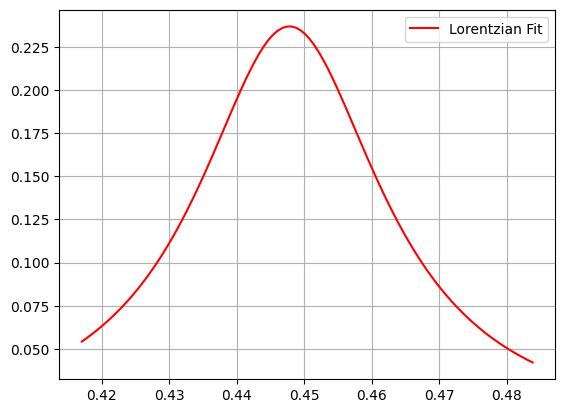

In [23]:
# prompt: define lorentzian function with parameters A, x0, gamma

def lorentzian(x, A, x0, gamma):
  """Lorentzian function."""
  return A / (1 + ((x - x0) / gamma)**2)

plt.plot(x_fit, lorentzian(x_fit, A_fit, x0_fit, gamma_fit), color='red', label='Lorentzian Fit')
plt.grid()
plt.legend()
plt.show()